In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ds = pd.read_csv('Mall_Customers.csv')
ds.head(5)

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
ds.loc[ds['Genre']=='Male','Genre'] = 0.0
ds.loc[ds['Genre']=='Female','Genre'] = 1.0

In [4]:
ds.isna().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

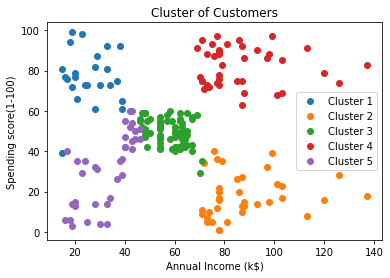

In [5]:
km = KMeans(n_clusters=5, init='k-means++', random_state=0)
km.fit(ds)
x_clusters = km.predict(ds)
for i in range(5):
    plt.scatter(ds.loc[x_clusters == i,'Annual_Income_(k$)'],ds.loc[x_clusters==i,'Spending_Score'],label='Cluster '+str(i+1))
    plt.legend()
plt.grid(False)
plt.title('Cluster of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score(1-100)')
plt.show()